Min-Max Normalized:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667
Standardized:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


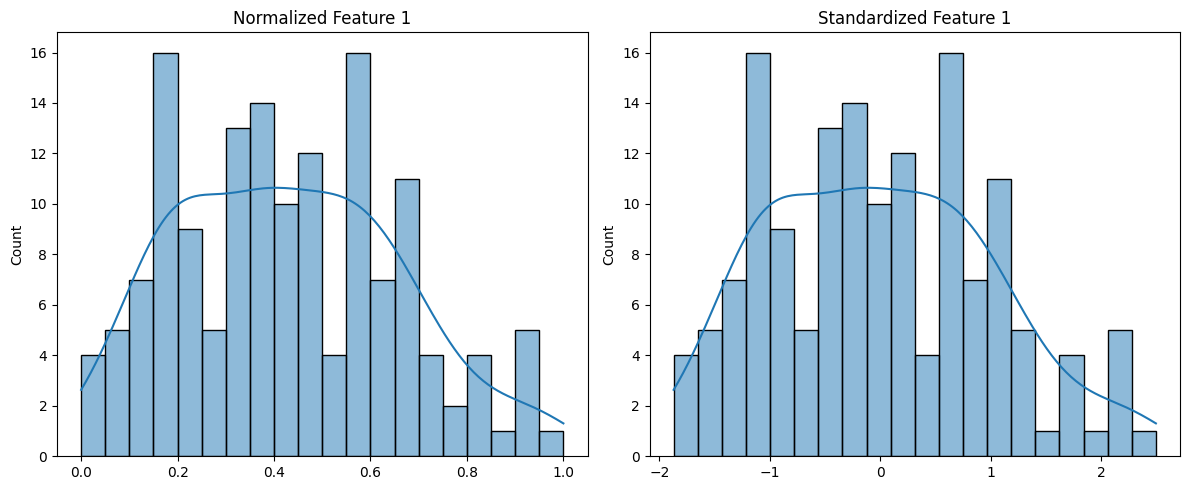

Accuracy on Raw Data: 1.0000
Accuracy after Normalization: 0.9111
Accuracy after Standardization: 1.0000

Conclusion:
- Normalization scales features to [0, 1], good for bounded models.
- Standardization (mean=0, std=1) is preferred for neural networks.
- Standardized input often leads to better convergence during training.



In [1]:
# Question 3: Data Preprocessing - Normalization vs Standardization
# Author: <Vaishnavi Gopi>
# student id:<700754518>

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Apply Min-Max Normalization
scaler_minmax = MinMaxScaler()
X_norm = scaler_minmax.fit_transform(X)

# Apply Standardization
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)

# Show transformed data
print("Min-Max Normalized:\n", pd.DataFrame(X_norm, columns=feature_names).head())
print("Standardized:\n", pd.DataFrame(X_std, columns=feature_names).head())

# Visualize distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_norm[:, 0], bins=20, kde=True).set(title='Normalized Feature 1')
plt.subplot(1, 2, 2)
sns.histplot(X_std[:, 0], bins=20, kde=True).set(title='Standardized Feature 1')
plt.tight_layout()
plt.show()

# Logistic Regression on each version
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

acc_raw = train_model(X, y)
acc_norm = train_model(X_norm, y)
acc_std = train_model(X_std, y)

print(f"Accuracy on Raw Data: {acc_raw:.4f}")
print(f"Accuracy after Normalization: {acc_norm:.4f}")
print(f"Accuracy after Standardization: {acc_std:.4f}")

print("""
Conclusion:
- Normalization scales features to [0, 1], good for bounded models.
- Standardization (mean=0, std=1) is preferred for neural networks.
- Standardized input often leads to better convergence during training.
""")
